## K-Means Clustering

3 bài ko dùng thư viện, huấn luyện và nhận xét về ảnh hưởng của bộ dữ liệu 600 điểm lên thuật toán K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from matplotlib.backends.backend_pdf import PdfPages

### Assignment 1 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

In [ ]:
# Tạo dữ liệu
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]
N = 200

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

In [ ]:
# Hàm hiển thị dữ liệu 
def plot_cluster(X, labels):
    X0 = X[labels == 0, :]
    X1 = X[labels == 1, :]
    X2 = X[labels == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], "rs", markersize=5, alpha=.5, label="X0")
    plt.plot(X1[:, 0], X1[:, 1], "go", markersize=5, alpha=.5, label="X1")
    plt.plot(X2[:, 0], X2[:, 1], "b^", markersize=5, alpha=.5, label="X2")

    plt.axis("scaled")
    plt.legend()
    plt.plot()
    plt.show()

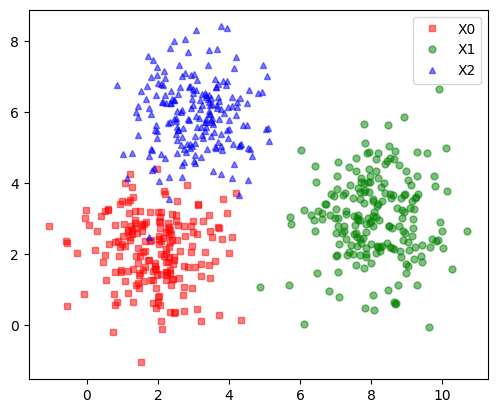

In [4]:
X = np.concatenate((X0, X1, X2), axis=0)
original_label = np.asarray([0]*N + [1]*N + [2]*N)
plot_cluster(X, original_label)

In [5]:
K = 3
# Hàm khởi tạo các điểm centroid
def init_centroid(X, K):
    index = np.random.choice(X.shape[0], K)
    return (X[index])

# Hàm gán nhãn mới cho các điểm tương ứng với centroid
def assign_label(X, centroids):
    d = np.zeros((X.shape[0], K))
    for i in range(K):
        d[:, i] = np.linalg.norm(X - centroids[i], axis=1)
    labels = np.argmin(d, axis=1)
    return labels

# Hàm cập nhật lại centroid mới
def update_centroids(X, labels, K):
    new_centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        Xk = X[labels == i]
        new_centroids[i] = np.mean(Xk, axis=0)
    return new_centroids

# hàm kiểm tra điều kiện dừng
def has_converged(centroids, new_centroids):
    return np.linalg.norm(centroids - new_centroids, axis=1)<1e-5

In [8]:
# Thuật toán KMeans
def KMeans(X, K):
    centroids = init_centroid(X, K)
    all_labels = []
    for i in range(1, 100):
        labels = assign_label(X, centroids)
        all_labels.append(labels)
        new_centroids = update_centroids(X, labels, K)
        if has_converged(centroids, new_centroids).all():
            break
        centroids = new_centroids
    return (centroids, all_labels, i)

Centroid found :
 [[1.89779752 2.10460424]
 [3.09029466 5.92871564]
 [8.1193062  3.03177323]]


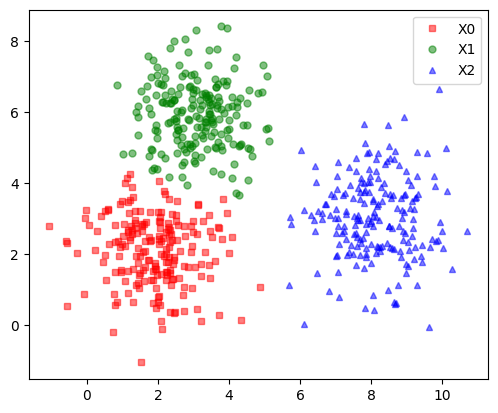

In [33]:
(centroids, all_labels, i) = KMeans(X, K)
print("Centroid found :\n", centroids)
plot_cluster(X, all_labels[-1])

* Nhận xét: Thuật toán phân cụm Kmeans hoạt động khá tốt. Tuy nhiên nếu chọn ngẫu nhiên tâm cụm thì kết quả không ổn định, mỗi lần có thể ra kết quả khác nhau. Nếu khởi tạo tốt thì sẽ hội tụ nhanh và cho ra kết quả tốt hơn, ngược lại sẽ mất thời gian (mất nhiều vòng lặp hơn để hội tụ). Phải chạy thuật toán nhiều lần với các khởi tạo ngẫu nhiên khác nhau để chọn được kết quả tốt nhất.

### Assignment 2 (2 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

xem số lượng quần thể khác nhau thì nó sẽ như nào

In [34]:
X0 = np.random.multivariate_normal(means[0], cov, 50)
X1 = np.random.multivariate_normal(means[1], cov, 20)
X2 = np.random.multivariate_normal(means[2], cov, 1000)

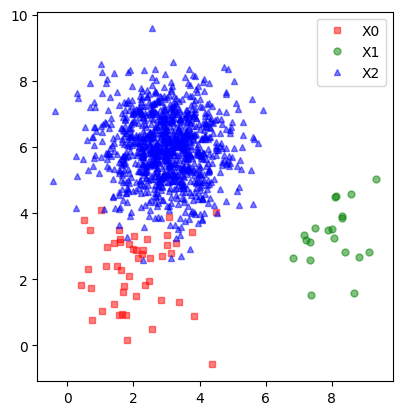

In [35]:
X = np.concatenate((X0, X1, X2), axis=0)
original_label = np.asarray([0]*50 + [1]*20 + [2]*1000)
plot_cluster(X, original_label)

Centroid found :
 [[2.11706583 5.93247585]
 [3.61854057 6.49709382]
 [3.63010384 3.81811052]]


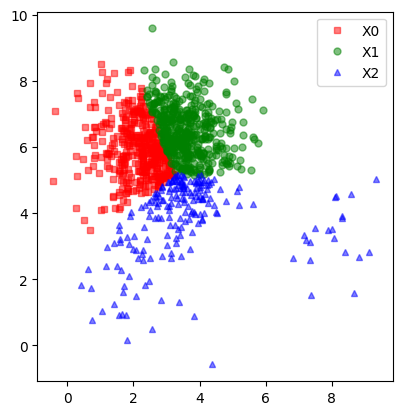

In [36]:
(centroids, all_labels, i) = KMeans(X, K)
print("Centroid found :\n", centroids)
plot_cluster(X, all_labels[-1])

* Nhận xét: Khi kích thước của các cụm khác nhau thì phâm cụm sẽ hoạt động kém hiệu quả vì KMeans là thuật toán tối ưu bình phương khoảng cách từ các điểm đến centroid. Do đó, kích thước cụm nào lớn hơn thì có tổng khoảng cách lớn hơn dẫn đến bị ảnh hưởng bởi số điểm. Ngược lại, cụm nhỏ dễ bị lệch tâm về cụm lớn và sai nhiều dẫn đến phân cụm không cân bằng. Với 1000 điểm dữ liệu ở cụm [3,6] có ảnh hưởng lớn đến 2 cụm ([2,2] với 50 điểm dữ liệu và [8,3] với 20 điểm dữ liệu), cụ thể centroid của các cụm không giữ được đúng vị trí trọng tâm cụm ban đầu mà bị kéo lệch lên.

### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

In [37]:
cov1 = [[1,0], [0,1]]
cov2 = [[10,0], [0,1]]
X0 = np.random.multivariate_normal(means[0], cov1, N)
X1 = np.random.multivariate_normal(means[1], cov1, N)
X2 = np.random.multivariate_normal(means[2], cov2, N)

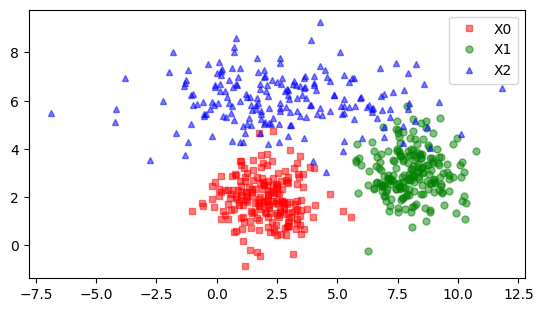

In [38]:
X = np.concatenate((X0, X1, X2), axis=0)
original_label = np.asarray([0]*N + [1]*N + [2]*N)
plot_cluster(X, original_label)

Centroid found :
 [[7.87540517 3.44941993]
 [1.94616576 1.91604677]
 [1.68627514 6.16610663]]


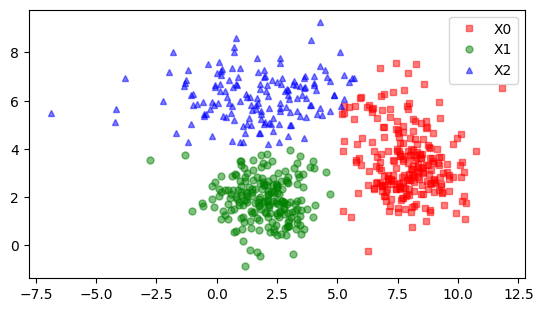

In [39]:
(centroids, all_labels, i) = KMeans(X, K)
print("Centroid found :\n", centroids)
plot_cluster(X, all_labels[-1])

* Nhận xét: Ảnh hưởng của $\mathcal{N}((3, 6), \Sigma_2)$ lên KMeans là:
    - cov2 có phương sai lớn dọc theo trục x nên dữ liệu phân bố rất rộng theo chều ngang dẫn đến các centroid bị kéo về phía các điểm xa hơn.
    - Do phân bố rộng nên các điểm ở rìa cụm có thể gần sát hoặc đè lên các điểm cụm khác dẫn đến độ chính xác giảm, nhãn sẽ bị gán sai.
    - Khi trực quan, dữ liệu sẽ scale ngang không gần trùng tâm ( vì chiều x là 10, y là 1) --> các cụm không còn dạng hình cầu như giả định của KMeans.